In [1]:
import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt
import matplotlib.colors as color
from scipy import stats
from sklearn import neighbors
from gadgetutils.utils import calc_hmf

# needs SciencePlots
plt.style.use(["science", "notebook", "grid"])

In [4]:
#part_mass = 8.574e10  # h^-1 Msun
#crit_dens = 2.237 * part_mass

part_mass = 8.574e10
crit_dens = 1.918e11

n_min = 20

data_dir = "../../dm-l256-n512-a100-analysis"
if '512' in data_dir:
    part_mass = 1.072e10

halos = h5py.File(data_dir + "/critical_shells.hdf5")
mask = halos["Nparticles"][:] > n_min

vr_data = h5py.File(data_dir+"/vr_data.hdf5")
    
fof100 = h5py.File(data_dir+"/fof_halos_100.hdf5")
    
with open(data_dir+"/fof_halos", 'rb') as f:
    fof_halos = pickle.load(f)
    
print(halos.attrs["Nshells"], "critical shells total")
if not (halos.attrs["Nshells"] == vr_data.attrs["Nshells"] and halos.attrs["Nshells"] == fof100.attrs["Nshells"] and 
        halos.attrs["Nshells"] == len(fof_halos["n"])):
    print("Warning - mismatch in number of critical shells")

print(np.sum(mask), "critical shells with more than", n_min, "particles")
print(np.min(halos["Radii"][:][mask]), np.max(halos["Radii"][:][mask]))

halos_scipy = h5py.File(data_dir + "/critical_shells_scipy.hdf5")
mask_scipy = halos_scipy["Nparticles"][:] > n_min

print(np.sum(mask_scipy), "critical shells with more than", n_min, "particles")
print(np.min(halos_scipy["Radii"][:][mask_scipy]), np.max(halos_scipy["Radii"][:][mask_scipy]))

183559 critical shells total
178522 critical shells with more than 20 particles
0.005179763793945313 0.13624363708496096
186811 critical shells with more than 20 particles
0.005179763793945313 0.13624363708496096


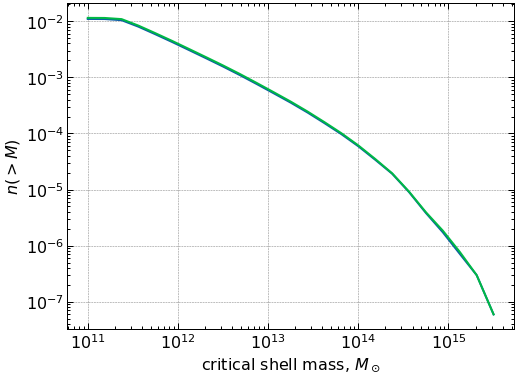

In [5]:
bins = np.logspace(11, 15.5, 25)
hmf, _ = calc_hmf(bins, halos["Masses"][:], 256)
hmf_scipy, _ = calc_hmf(bins, halos_scipy["Masses"][:], 256)
plt.plot(bins, hmf)
plt.plot(bins, hmf_scipy)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("critical shell mass, $M_\odot$")
plt.ylabel("$n(>M)$")
plt.show()

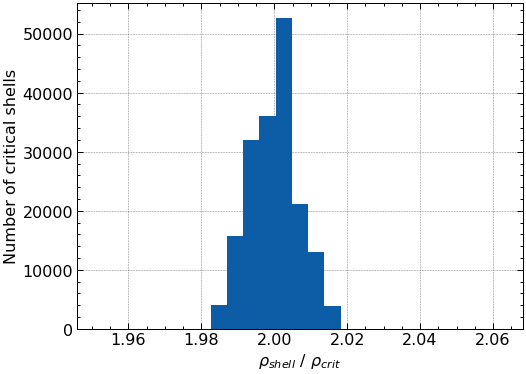

1.951368120361731 2.000065728784836 2.0626982553039803


In [6]:
densities = halos["Masses"][:][mask] / (4/3 * np.pi * (100*halos["Radii"][:][mask])**3)
plt.hist(densities / crit_dens, bins=25)
#plt.yscale('log')
plt.xlabel("$\\rho_{shell}$ / $\\rho_{crit}$")
plt.ylabel("Number of critical shells")
plt.show()
print(np.min(densities / crit_dens), np.mean(densities / crit_dens), np.max(densities / crit_dens))
#i = np.where(np.abs(densities / crit_dens - 13) < 1)[0]
#print(halos["centers"][i], halos["radii"][i], halos["n"][i])

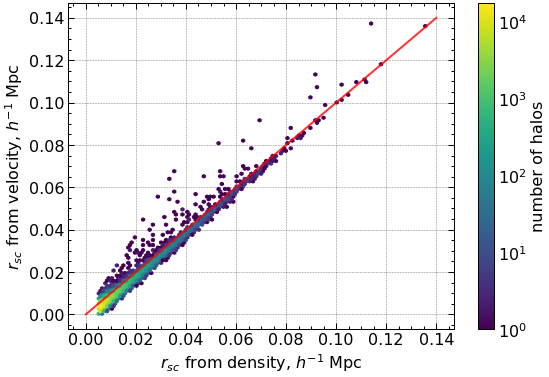

In [7]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
plt.hexbin(halos["Radii"][:][mask], vr_data["Radii"][:][mask], mincnt=1, norm=color.LogNorm())
plt.plot([0, 0.14], [0, 0.14], 'r-', alpha=0.8)
plt.xlabel("$r_{sc}$ from density, $h^{-1}$ Mpc")
plt.ylabel("$r_{sc}$ from velocity, $h^{-1}$ Mpc")
plt.colorbar(label="number of halos")

# filter n > 100
#plt.subplot(1,2,2)
#n_cut = halos["Nparticles"] > 100
#plt.title("halos with n>100")
#plt.hexbin(halos["Radii"][n_cut], vr_data["Radii"][n_cut], mincnt=1, norm=color.LogNorm())
#plt.plot([0, 0.14], [0, 0.14], 'r-', alpha=0.8)
#plt.xlabel("$r_{sc}$ from density, $h^{-1}$ Mpc")
#plt.ylabel("$r_{sc}$ from velocity, $h^{-1}$ Mpc")
#plt.colorbar(label="number of halos")
plt.show()

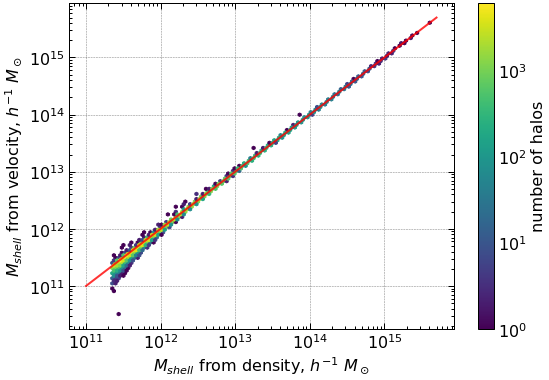

In [8]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
plt.hexbin(part_mass*halos["Nparticles"][:][mask], part_mass*vr_data["Nparticles"][:][mask], mincnt=1, 
           norm=color.LogNorm(), xscale='log', yscale='log')
plt.plot([1e11, 5e15], [1e11, 5e15], 'r-', alpha=0.8)
plt.xlabel("$M_{shell}$ from density, $h^{-1}$ $M_\odot$")
plt.ylabel("$M_{shell}$ from velocity, $h^{-1}$ $M_\odot$")
plt.colorbar(label="number of halos")

#plt.subplot(1,2,2)
#plt.hexbin(halos["n"][n_cut], vr_data["n_vr"][n_cut], mincnt=1, norm=color.LogNorm(), xscale='log', yscale='log')
#plt.plot([1e2, 5e5], [1e2, 5e5], 'r-', alpha=0.8)
#plt.xlabel("$N$ from density")
#plt.ylabel("$N$ from velocity")
#plt.colorbar(label="number of halos")
plt.show()

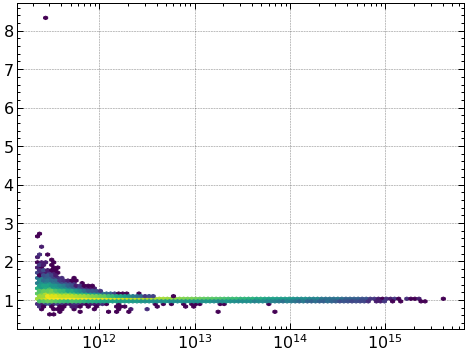

In [9]:
plt.hexbin(part_mass*halos["Nparticles"][:][mask], halos["Nparticles"][:][mask] / vr_data["Nparticles"][:][mask], mincnt=1, 
           norm=color.LogNorm(), xscale='log')

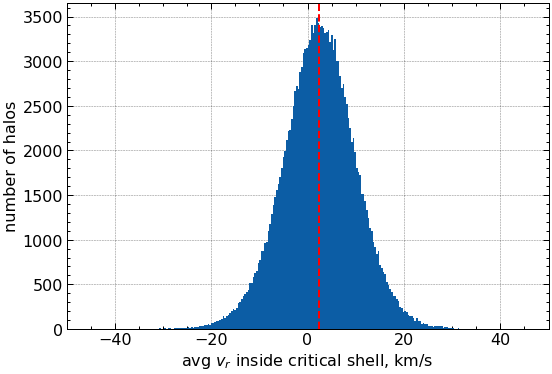

(2.4464568661510175, 7.548747172266309)


In [11]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
plt.hist(vr_data["AvgVr"][:][mask], bins="auto")
mean1 = np.nanmean(vr_data["AvgVr"][:][mask])
std1 = np.nanstd(vr_data["AvgVr"][:][mask])
plt.axvline(mean1, ls='--', color="red")
plt.xlabel("avg $v_r$ inside critical shell, km/s")
plt.ylabel("number of halos")
plt.xlim(-50, 50)

#plt.subplot(1,2,2)
#plt.hist(vr_data["avg_vr"][n_cut], bins="auto")
#mean2 = np.nanmean(vr_data["avg_vr"][n_cut])
#std2 = np.nanstd(vr_data["avg_vr"][n_cut])
#plt.axvline(mean2, ls='--', color="red")
#plt.xlabel("avg $v_r$ inside critical shell, km/s")
#plt.ylabel("number of halos")
#plt.xlim(-50, 50)
plt.show()
print((mean1, std1))#, (mean2, std2))

In [12]:
plt.figure(figsize=(9,6))
plt.hexbin(vr_data["radii_vr"], vr_data["avg_vr"], norm=color.LogNorm(), mincnt=1)
plt.xlabel("$r_{sc}$, $h^{-1}$ Mpc")
plt.ylabel("average $v_r$, km/s")
plt.colorbar(label="number of halos")
plt.show()

KeyError: "Unable to open object (object 'radii_vr' doesn't exist)"

<Figure size 648x432 with 0 Axes>

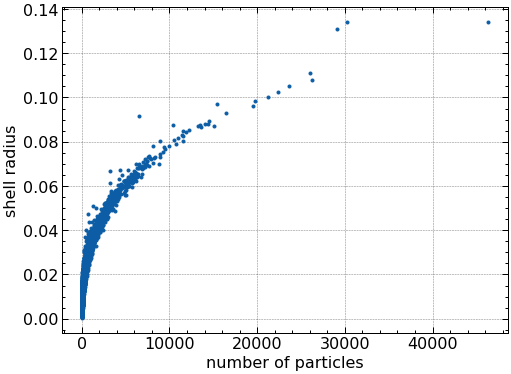

In [13]:
plt.plot(vrstats["n"], vr_radii, '.')
plt.xlabel("number of particles")
plt.ylabel("shell radius")
plt.show()

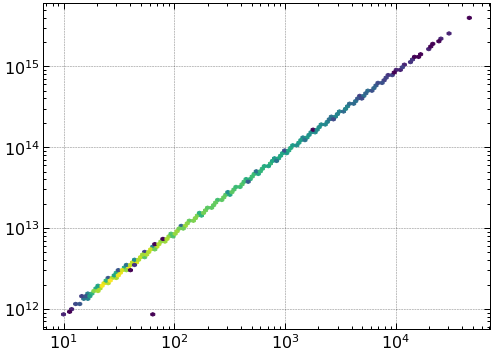

LinregressResult(slope=85738747168.15935, intercept=8546806449.052734, rvalue=0.999999810679146, pvalue=0.0, stderr=293346.647333671, intercept_stderr=232499833.2243109)

In [14]:
plt.hexbin(vrstats["n"], halos["masses"], norm=color.LogNorm(), mincnt=1, xscale='log', yscale='log')
plt.show()

stats.linregress(vrstats["n"], halos["masses"])

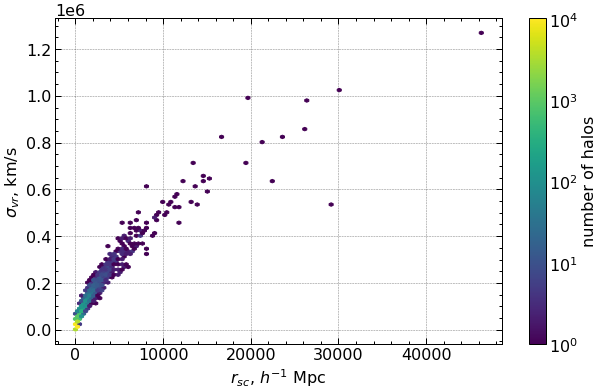

In [15]:
plt.figure(figsize=(10,6))
plt.hexbin(vrstats["n"], vrstats["std"]**2, norm=color.LogNorm(), mincnt=1)
plt.xlabel("$r_{sc}$, $h^{-1}$ Mpc")
plt.ylabel("$\sigma_{vr}$, km/s")
plt.colorbar(label="number of halos")
plt.show()

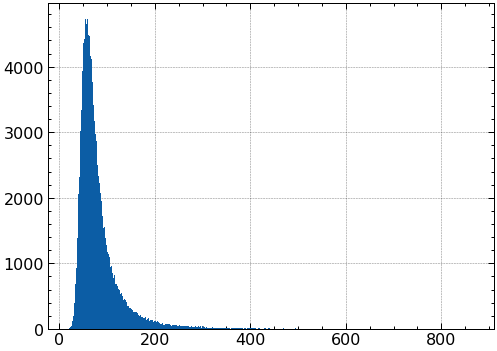

In [37]:
plt.hist(vr_data["std_vr"], bins="auto")
plt.show()

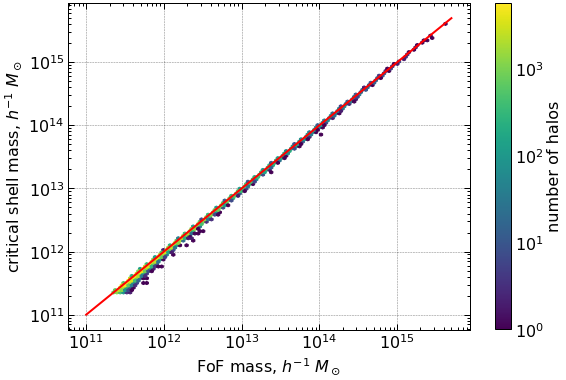

In [33]:
plt.figure(figsize=(9,6))
plt.hexbin(part_mass*fof100["Nparticles"][:][mask], part_mass*halos["Nparticles"][:][mask], xscale='log', yscale='log', 
           mincnt=1, norm=color.LogNorm())
plt.colorbar(label="number of halos")
plt.plot([1e11,5e15],[1e11,5e15], 'r-')
plt.xlabel("FoF mass, $h^{-1}$ $M_\odot$")
plt.ylabel("critical shell mass, $h^{-1}$ $M_\odot$")
plt.show()

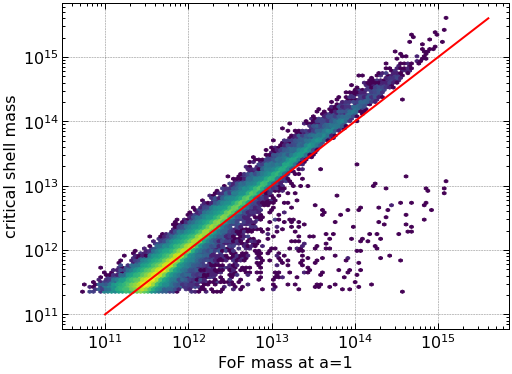

In [34]:
plt.hexbin(part_mass*(fof_halos["n"][mask]), part_mass*halos["Nparticles"][:][mask], xscale='log', yscale='log', 
           mincnt=1, norm=color.LogNorm())
plt.plot([1e11,4e15], [1e11,4e15], 'r-')
plt.xlabel("FoF mass at a=1")
plt.ylabel("critical shell mass")
plt.show()

In [15]:
# pick out interesting halos
fof_cond = np.multiply(fof_halos["n"]*part_mass > 1e14, fof_halos["n"]*part_mass < 1e15)
cr_cond = np.multiply(halos["Nparticles"][:]*part_mass > 2e12, halos["Nparticles"][:]*part_mass < 1e13)
np.where(np.multiply(fof_cond, cr_cond))

(array([10297, 21329, 22891]),)

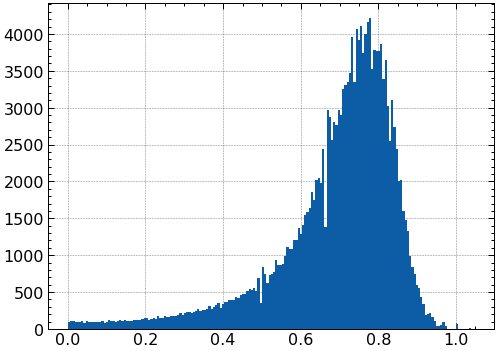

0.6902452532996917 0.15836353575891007


In [28]:
#n_cut = vrstats["n"] > 20
plt.hist(fof_halos["frac"][mask], bins="auto")
plt.show()
print(np.mean(fof_halos["frac"][mask]), np.std(fof_halos["frac"][mask]))

In [4]:
print(min(fof_halos["frac"][n_cut]))
np.where(fof_halos["frac"] == min(fof_halos["frac"][n_cut]))

0.025296442687747035


(array([16056]),)

In [7]:
plt.figure(figsize=(9,6))
plt.hexbin(part_mass*vrstats["n"][n_cut], fof_halos["frac"][n_cut], mincnt=1, norm=color.LogNorm(), xscale='log')
plt.xlabel("critical shell mass")
plt.ylabel("fraction collapsed")
plt.colorbar(label="number of halos")
plt.show()

NameError: name 'vrstats' is not defined

<Figure size 648x432 with 0 Axes>

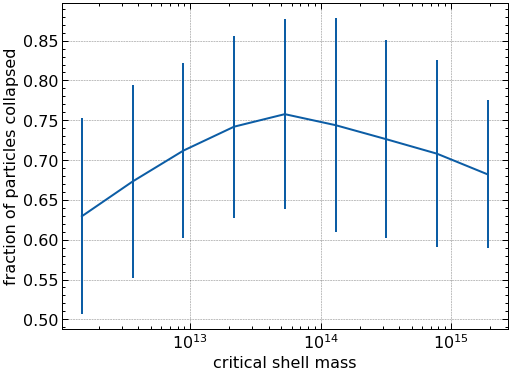

In [9]:
bins = np.logspace(1,4.5,10)
avg_frac = []
std = []
for i in range(len(bins)-1):
    mask = (vrstats["n"][n_cut] >= bins[i]) * (vrstats["n"][n_cut] < bins[i+1])
    avg_frac.append(np.mean(fof_halos["frac"][n_cut][mask]))
    std.append(np.std(fof_halos["frac"][n_cut][mask]))
plt.errorbar(part_mass*0.5*(bins[1:]+bins[:-1]), avg_frac, yerr=std)
plt.xscale('log')
plt.xlabel("critical shell mass")
plt.ylabel("fraction of particles collapsed")
plt.show()